In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rewards import *
from models import *

# Multi-arm bandit problem with Bernoulli reward

Bernouli Bandit


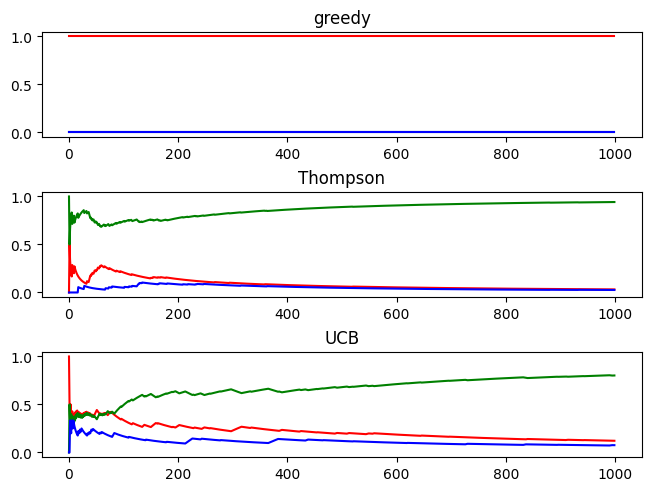

In [146]:
k = 3 # number of arms
n_iter = 1000
bernouli_reward = BernouliBanditReward([0.8, 0.9, 0.7])

greedy_solver = BetaGreedyBandit(k, bernouli_reward)
TS_solver = ThompsonBernouliBandit(k, bernouli_reward)
ucb_solver = UCBsolver(k, bernouli_reward, 1)

greedy_data, greedy_reward = greedy_solver.simulate(n_iter)
ts_data, ts_reward = TS_solver.simulate(n_iter)
ucb_data, ucb_reward = ucb_solver.simulate(n_iter)


def draw_sim(ax, data, label: str):
    colors = ["r", "g", "b"]
    ax.set_title(label)
    for i in range(k):
        ax.plot([i for i in range(n_iter)], data[i, :], c=colors[i])


figure, axs = plt.subplots(3, sharey=True, constrained_layout=True)
print("Bernouli Bandit")
draw_sim(axs[0], greedy_data, "greedy")
draw_sim(axs[1], ts_data, "Thompson")
draw_sim(axs[2], ucb_data, "UCB")
plt.show()

This graph shows ratio between chosen actions. `X` axis is iteration number, `Y` axis shows portion of all chosen actions to this iteration for every action. For given initial thetas, Thompson sampling converges to the best arm faster than others. Greedy stays in local optima and UCB hadn't converge yet

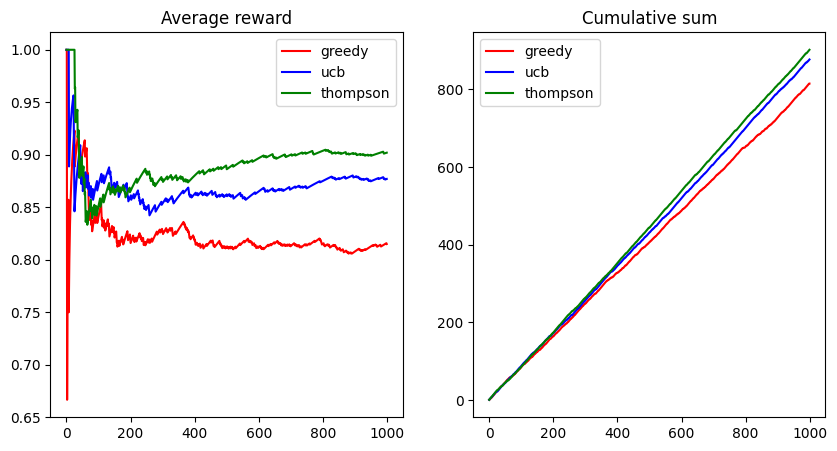

In [147]:
def get_avg_values(data):
    # get average reward for every iteration
    cumul_reward = np.cumsum(data)
    for i in range(data.shape[0]):
        cumul_reward[i] /= i+1
    return cumul_reward

figure, axs = plt.subplots(ncols=2, sharex=True, figsize=(10, 5))

axs[0].set_title("Average reward")
# axs[0].set_ylim(0, 1)
axs[0].plot([i for i in range(n_iter)], get_avg_values(greedy_reward), label="greedy", c='r')
axs[0].plot([i for i in range(n_iter)], get_avg_values(ucb_reward), label="ucb", c='b')
axs[0].plot([i for i in range(n_iter)], get_avg_values(ts_reward), label="thompson", c='g')
axs[0].legend()

axs[1].set_title("Cumulative sum")
axs[1].plot([i for i in range(n_iter)], np.cumsum(greedy_reward), label="greedy", c='r')
axs[1].plot([i for i in range(n_iter)], np.cumsum(ucb_reward), label="ucb", c='b')
axs[1].plot([i for i in range(n_iter)], np.cumsum(ts_reward), label="thompson", c='g')
axs[1].legend()
plt.show()

Here we can see that in the end, Thompson got reward better than others. In addition, average reward is much higher.

# Gaussian Multi-arm Bandit

Gaussian Reward


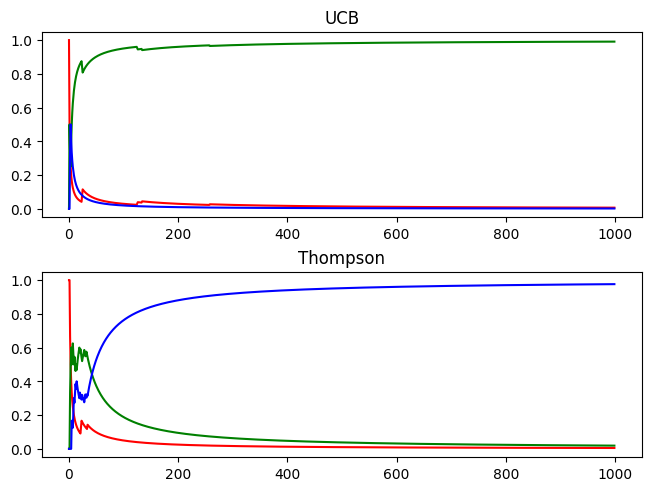

In [144]:
means = [1, 2, 3]
stds = [1, 2, 3]
gaus_reward = GaussianReward(means, stds)
k = 3
ucb_solver = UCBsolver(k, gaus_reward, 1.0)
thompson_solver = GaussianThompson(k, [x*x for x in stds], gaus_reward)
ucb_data, ucb_reward = ucb_solver.simulate(n_iter)
thompson_data, ts_reward = thompson_solver.simulate(n_iter)

figure, axs = plt.subplots(2, sharey=True, constrained_layout=True)
print("Gaussian Reward")
draw_sim(axs[0], ucb_data, "UCB")
draw_sim(axs[1], thompson_data, "Thompson")
plt.show()

Here we can see that Thompson, converges to arm with biggest mean, despite of big variance. On the other hand, UCB can strugle with arms with big variances. However, the results are quite similar and if you run algorithm multiple times, it will produce different plots. Performance of Thompson only slightly better than UCB, but keep in mind that you need to tune hyperparameter `c` for UCB.

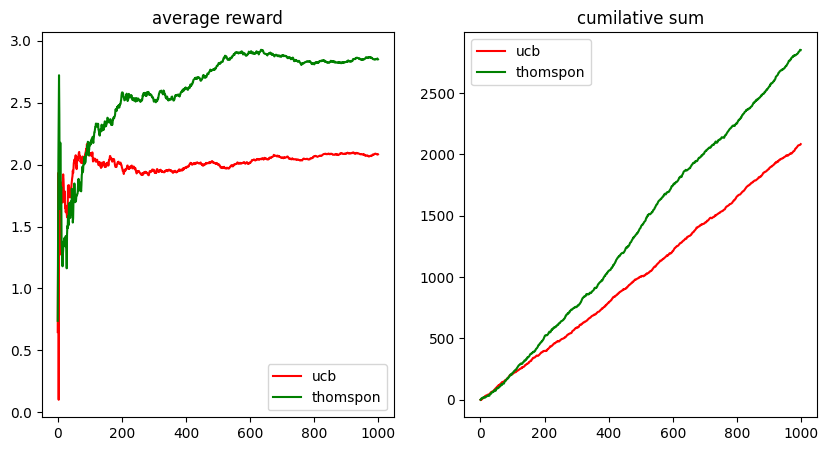

In [145]:
figure, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].set_title("average reward")
axs[0].plot([i for i in range(n_iter)], get_avg_values(ucb_reward), label="ucb", c='r')
axs[0].plot([i for i in range(n_iter)], get_avg_values(ts_reward), label="thomspon", c='g')
axs[0].legend()

axs[1].set_title("cumilative sum")
axs[1].plot([i for i in range(n_iter)], np.cumsum(ucb_reward), label="ucb", c='r')
axs[1].plot([i for i in range(n_iter)], np.cumsum(ts_reward), label="thomspon", c='g')
axs[1].legend()

plt.show()


# Product assesment problem

[[ 1.23999847e+00  2.71981895e-02 -2.67929227e-01 -2.60587724e-01
   1.80707337e-01  1.17063105e-01]
 [-3.79594760e-01  1.02374721e+00 -4.08817517e-02 -1.38744962e-01
   1.68563020e-01  1.24843942e-01]
 [-2.93552927e-04  4.03352428e-01  9.43831775e-01  2.18914838e-01
   7.69274667e-02  8.86241590e-03]
 [ 2.09698916e-01  2.52240459e-01 -6.53081355e-03  1.01449360e+00
   9.60978250e-03  2.74541159e-01]
 [-4.63581395e-01  8.08512375e-02  9.13015431e-02  5.39911222e-02
   7.85198412e-01  8.76817170e-02]
 [ 1.06943527e-01 -3.94845913e-01  4.44556793e-02  1.11982706e-01
  -5.28069287e-03  6.68287903e-01]]


[]

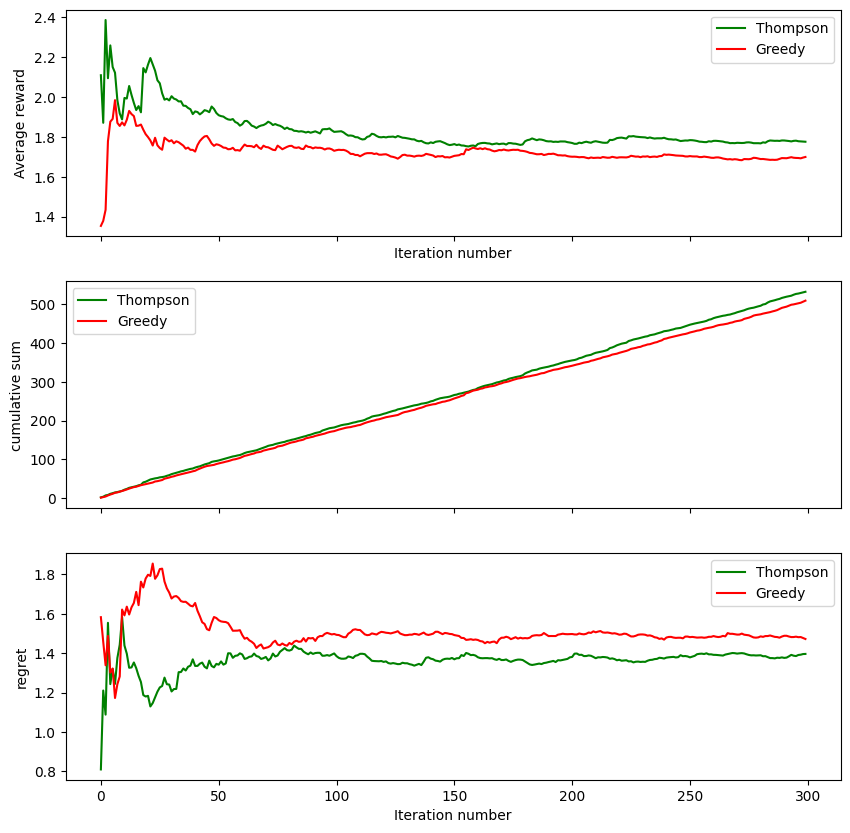

In [102]:
n = 6
k = 4
n_iter = 300
demand_std = 0.4
profits = np.random.normal(1/n, 0.05, size=n)

assortment_reward = ProductAssortmentReward(profits, np.sqrt(demand_std))
# assortmnet_reward.get_reward([0, 1, 1, 1, 1])
ts_solver = ThompsonAssortmnet(n, k, profits, assortment_reward, np.sqrt(demand_std))
ts_rewards, ts_optimals = ts_solver.simulate(n_iter)

greedy_solver = GreedyAssortment(n, k, profits, assortment_reward, np.sqrt(demand_std))
g_rewards, g_optimals = greedy_solver.simulate(n_iter)

figure, axs = plt.subplots(nrows=3, figsize=(10, 10), sharex=True)
axs[0].set_xlabel("Iteration number")
axs[0].set_ylabel("Average reward")
axs[0].plot([i for i in range(n_iter)], get_avg_values(ts_rewards), c="g", label="Thompson")
axs[0].plot([i for i in range(n_iter)], get_avg_values(g_rewards), c="r", label="Greedy")

axs[1].set_ylabel("cumulative sum")
axs[1].plot([i for i in range(n_iter)], np.cumsum(ts_rewards), c="g", label="Thompson")
axs[1].plot([i for i in range(n_iter)], np.cumsum(g_rewards), c="r", label="Greedy")

axs[2].set_ylabel("regret")
axs[2].plot([i for i in range(n_iter)], get_avg_values(ts_optimals - ts_rewards), c="g", label="Thompson")
axs[2].plot([i for i in range(n_iter)], get_avg_values(g_optimals - g_rewards), c="r", label="Greedy")

for ax in axs:
    ax.legend()
axs[-1].set_xlabel("Iteration number")
print(assortment_reward.thetas)
plt.plot()